In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import seaborn as sns

In [37]:
trn_id=pd.read_csv('train_identity.csv') 
trn_trans=pd.read_csv('train_transaction.csv')
trn_data=pd.merge(trn_id, trn_trans, on='TransactionID', how='outer')

In [38]:
import gc
del trn_id,trn_trans
gc.collect()

22

In [39]:
x=trn_data[trn_data["isFraud"].notna()]

In [40]:
 x= x.loc[:, x.isnull().sum() < 0.75*x.shape[0]]

In [41]:
del trn_data
gc.collect()

66

In [42]:
y=x.pop("isFraud")

In [43]:
x.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987004,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2987008,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987010,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,credit,...,90.327904,90.327904,90.327904,90.327904,0.0,0.0,0.0,75.887497,75.887497,75.887497
3,2987011,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2987016,86620,30.000,H,1790,555.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [44]:
x.card4.describe()

count     588963
unique         4
top         visa
freq      384767
Name: card4, dtype: object

In [45]:
x.V312.describe()

count    590528.000000
mean         39.173910
std         172.128339
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V312, dtype: float64

In [46]:
z=x.pop('TransactionID')
del z
gc.collect()

110

In [47]:
tst_id=pd.read_csv('test_identity.csv') 
tst_trans=pd.read_csv('test_transaction.csv')
tst_data=pd.merge(tst_id, tst_trans, on='TransactionID', how='outer')
del tst_id,tst_trans
gc.collect()

0

In [48]:
tst_data.rename({'id-01':'id_01','id-02':'id_02','id-03':'id_03','id-04':'id_04','id-05':'id_05','id-06':'id_06','id-07':'id_07','id-08':'id_08','id-09':'id_09','id-10':'id_10','id-11':'id_11','id-12':'id_12','id-13':'id_13','id-14':'id_14','id-15':'id_15','id-16':'id_16','id-17':'id_17','id-18':'id_18','id-19':'id_19','id-20':'id_20','id-21':'id_21','id-22':'id_22','id-23':'id_23','id-24':'id_24','id-25':'id_25','id-26':'id_26','id-27':'id_27','id-28':'id_28','id-29':'id_29','id-30':'id_30','id-31':'id_31', 'id-32':'id_32', 'id-33':'id_33', 'id-34':'id_34', 'id-35':'id_35', 'id-36':'id_36', 'id-37':'id_37', 'id-38':'id_38'}, axis=1, inplace=True)

In [49]:
z=tst_data.pop('TransactionID')
del z
gc.collect()

44

In [50]:
z=x.pop('TransactionDT')
z=tst_data.pop('TransactionDT')
del z

In [51]:
tst_data.M1.describe()

count     330052
unique         2
top            T
freq      330021
Name: M1, dtype: object

In [52]:
for i in range(1,7):
    x['card'+str(i)]=x['card'+str(i)].astype(str)
    tst_data['card'+str(i)]=tst_data['card'+str(i)].astype(str)

In [53]:
for i in range(1,3):
    x['addr'+str(i)]=x['addr'+str(i)].astype(str)
    tst_data['addr'+str(i)]=tst_data['addr'+str(i)].astype(str)

In [54]:
cat_col= [c for c in x.columns if
                   x[c].dtype == "object"]


num_col = [c for c in x.columns if 
                  c not in cat_col]

In [55]:
print(cat_col)

['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [56]:
print(num_col)

['TransactionAmt', 'dist1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V11

In [57]:
x['card1'].describe()

count     590540
unique     13553
top         7919
freq       14932
Name: card1, dtype: object

In [58]:
tst_data['card1'].describe()

count     506691
unique     13244
top         7919
freq       13083
Name: card1, dtype: object

In [59]:
for c in cat_col:
    x[c]=x[c].astype(str)
    tst_data[c]=tst_data[c].astype(str)

In [60]:
print(type(x.addr1[0]))

<class 'str'>


In [61]:
for c in cat_col:
    x[c]=x[c].replace('nan','NA')

In [62]:
for c in cat_col:
    tst_data[c]=tst_data[c].replace('nan','NA')

In [63]:
x[cat_col].head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,anonymous.com,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,C,16496,352.0,117.0,mastercard,134.0,credit,NA,NA,gmail.com,NA,NA,NA,M0,NA,NA,NA,NA,NA
3,C,4461,375.0,185.0,mastercard,224.0,debit,NA,NA,hotmail.com,NA,NA,NA,M0,NA,NA,NA,NA,NA
4,H,1790,555.0,150.0,visa,226.0,debit,170.0,87.0,aol.com,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [64]:
tst_data[cat_col].head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,C,15885,545.0,185.0,visa,138.0,debit,NA,NA,hotmail.com,NA,NA,NA,M2,NA,NA,NA,NA,NA
1,S,2453,399.0,150.0,american express,137.0,credit,494.0,87.0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,C,15885,545.0,185.0,visa,138.0,debit,NA,NA,anonymous.com,NA,NA,NA,M2,NA,NA,NA,NA,NA
3,C,15885,545.0,185.0,visa,138.0,debit,NA,NA,hotmail.com,NA,NA,NA,M2,NA,NA,NA,NA,NA
4,C,9633,130.0,185.0,visa,138.0,debit,NA,NA,hotmail.com,NA,NA,NA,M2,NA,NA,NA,NA,NA


In [65]:
myinp=SimpleImputer()
x_num=pd.DataFrame(myinp.fit_transform(x[num_col]),columns=num_col)
tst_data_num=pd.DataFrame(myinp.fit_transform(tst_data[num_col]),columns=num_col)

In [66]:
x_num.dist1.describe()

count    590540.000000
mean        118.502180
std         236.212066
min           0.000000
25%          13.000000
50%         118.502180
75%         118.502180
max       10286.000000
Name: dist1, dtype: float64

In [67]:
x=pd.concat((x[cat_col],x_num),axis=1)
tst_out=pd.concat((tst_data[cat_col],tst_data_num),axis=1)

In [68]:
del tst_data

In [69]:
gc.collect()

220

In [70]:
tst_out.shape

(506691, 223)

In [71]:
x.shape

(590540, 223)

In [72]:
x.head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,anonymous.com,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,C,16496,352.0,117.0,mastercard,134.0,credit,NA,NA,gmail.com,...,90.327904,90.327904,90.327904,90.327904,0.0,0.0,0.0,75.887497,75.887497,75.887497
3,C,4461,375.0,185.0,mastercard,224.0,debit,NA,NA,hotmail.com,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,H,1790,555.0,150.0,visa,226.0,debit,170.0,87.0,aol.com,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [73]:
tst_out.head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,C,15885,545.0,185.0,visa,138.0,debit,NA,NA,hotmail.com,...,0.0,21.238136,43.269524,26.730428,0.0,0.0,0.0,0.000,0.000,0.000
1,S,2453,399.0,150.0,american express,137.0,credit,494.0,87.0,NA,...,90.0,60.000000,310.000000,130.000000,0.0,0.0,0.0,0.000,0.000,0.000
2,C,15885,545.0,185.0,visa,138.0,debit,NA,NA,anonymous.com,...,0.0,21.238136,43.269524,26.730428,0.0,0.0,0.0,0.000,0.000,0.000
3,C,15885,545.0,185.0,visa,138.0,debit,NA,NA,hotmail.com,...,0.0,21.238136,43.269524,26.730428,0.0,0.0,0.0,6.271,6.271,6.271
4,C,9633,130.0,185.0,visa,138.0,debit,NA,NA,hotmail.com,...,0.0,21.238136,43.269524,26.730428,0.0,0.0,0.0,0.000,0.000,0.000


In [74]:
print(x.ProductCD.dtype)

object


In [75]:
tst_out['ProductCD'].describe()
    

count     506691
unique         5
top            W
freq      360987
Name: ProductCD, dtype: object

In [76]:
x.V312.describe()

count    590540.00000
mean         39.17391
std         172.12659
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       55125.00000
Name: V312, dtype: float64

In [77]:
for c in cat_col:
    x[c+'freq']=(x.groupby(c)[c].transform('count')/x[c].count())
    tst_out[c+'freq']=(tst_out.groupby(c)[c].transform('count')/tst_out[c].count())
    
    

In [78]:
x[['card4','card4freq']].head()

,card4,card4freq
0,mastercard,0.320414
1,visa,0.651551
2,mastercard,0.320414
3,mastercard,0.320414
4,visa,0.651551


In [79]:
x['card4freq'].describe()

count    590540.000000
mean          0.527517
std           0.176696
min           0.002670
25%           0.320414
50%           0.651551
75%           0.651551
max           0.651551
Name: card4freq, dtype: float64

In [80]:
for c in cat_col:
    x[c+'avg'+'TransactionAmt']=(x.groupby(c)['TransactionAmt'].transform('mean'))
    tst_out[c+'avg'+'TransactionAmt']=(tst_out.groupby(c)['TransactionAmt'].transform('mean'))
    x[c+'avg'+'dist1']=(x.groupby(c)['dist1'].transform('mean'))
    tst_out[c+'avg'+'dist1']=(tst_out.groupby(c)['dist1'].transform('mean'))
    
    x[c+'sum'+'TransactionAmt']=(x.groupby(c)['TransactionAmt'].transform('sum'))
    tst_out[c+'sum'+'TransactionAmt']=(tst_out.groupby(c)['TransactionAmt'].transform('sum'))
    x[c+'sum'+'dist1']=(x.groupby(c)['dist1'].transform('sum'))
    tst_out[c+'sum'+'dist1']=(tst_out.groupby(c)['dist1'].transform('sum'))
    
    

In [81]:
x.shape

(590540, 318)

In [82]:
tst_out.shape

(506691, 318)

In [83]:
cnt=0
numcreate=[]
for i  in range(1,len(num_col)):
    for j in range(i+1,len(num_col)):
        if x[num_col[i]].corr(x[num_col[j]])>0.95 and  tst_out[num_col[i]].corr(tst_out[num_col[j]])>0.95:
            numcreate.append([num_col[i],num_col[j]])
            cnt+=1
print(cnt)

26


In [84]:
x['Allcard']=x['card1'].astype(str)
tst_out['Allcard']=tst_out['card1'].astype(str)
for i in range(2,7):
    x['Allcard']=x['Allcard']+'_'+x['card'+str(i)].astype(str)
    tst_out['Allcard']=tst_out['Allcard']+'_'+tst_out['card'+str(i)].astype(str)

In [86]:
x['Allcard'].describe()

count                                590540
unique                                14893
top       9500_321.0_150.0_visa_226.0_debit
freq                                  14112
Name: Allcard, dtype: object

In [87]:
x['Alladdr']=x['addr1'].astype(str)+'_'+x['addr2'].astype(str)
tst_out['Alladdr']=tst_out['addr1'].astype(str)+'_'+tst_out['addr2'].astype(str)

In [88]:
x[['Alladdr','addr1']].head()

,Alladdr,addr1
0,420.0_87.0,420.0
1,337.0_87.0,337.0
2,NA_NA,NA
3,NA_NA,NA
4,170.0_87.0,170.0


In [89]:
x['AllM']=x['M1'].astype(str)
tst_out['AllM']=tst_out['M1'].astype(str)
for i in range(2,10):
    x['AllM']=x['AllM']+'_'+x['M'+str(i)].astype(str)
    tst_out['AllM']=tst_out['AllM']+'_'+tst_out['M'+str(i)].astype(str)

In [93]:
print(type(x['AllM'][0]))

<class 'str'>


In [94]:
x['AllproductcardM']=x['ProductCD']+'_'+x['Allcard']+'_'+x['AllM']

In [95]:
tst_out['AllproductcardM']=tst_out['ProductCD']+'_'+tst_out['Allcard']+'_'+tst_out['AllM']

In [96]:
x.shape

(590540, 322)

In [97]:
tst_out.shape

(506691, 322)

In [98]:
for v in numcreate:
    x[str(v[0])+'_'+str(v[1])]=x[v[0]]+x[v[1]]
    tst_out[str(v[0])+'_'+str(v[1])]=tst_out[v[0]]+tst_out[v[1]]

In [99]:
ncat_col= [c for c in x.columns if
                   x[c].dtype == "object"]


nnum_col = [c for c in x.columns if 
                  c not in ncat_col]

In [100]:
print(ncat_col)

['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'Allcard', 'Alladdr', 'AllM', 'AllproductcardM']


In [101]:
x.shape

(590540, 348)

In [102]:
tst_out.shape

(506691, 348)

In [103]:
x=pd.concat((x[ncat_col],x[nnum_col]),axis=1)

In [104]:
tst_out=pd.concat((tst_out[ncat_col],tst_out[nnum_col]),axis=1)

In [105]:
fdt=pd.concat((tst_out,x),axis=0)

In [106]:
fdt.shape

(1097231, 348)

In [107]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
newx=x.copy()
newtst_out=tst_out.copy()
for c in ncat_col:
    le.fit(fdt[c])
    newx[c]=le.transform(x[c])
    newtst_out[c]=le.transform(tst_out[c])


In [115]:
newx.card4.describe()

count    590540.000000
mean          3.604073
std           0.615105
min           0.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: card4, dtype: float64

In [116]:
y.shape

(590540,)

In [117]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
model=RandomForestClassifier()
model.fit(newx,y.values)

RandomForestClassifier()

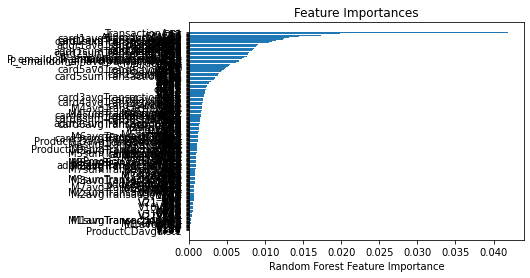

In [119]:
col_names=ncat_col+nnum_col
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()


In [120]:
final_col=[col_names[i] for i in idxs if importances[i]>0.0020 ]
print(len(final_col))

112


In [121]:
print(final_col)

['V320', 'V61', 'V24', 'V316', 'V131', 'V76', 'V281', 'V124', 'V134', 'V102', 'V53', 'V54', 'V23', 'card3', 'V125', 'V295', 'V78', 'V126', 'V96', 'V291', 'V62', 'V83', 'V280', 'V38', 'C9', 'V130', 'V128', 'D11', 'V312', 'V133', 'D3', 'V306', 'V318', 'V285', 'V127', 'D5', 'card5sumTransactionAmt', 'card5freq', 'V282', 'V314', 'card5sumdist1', 'V294', 'V317', 'V313', 'card5', 'V315', 'card5avgdist1', 'dist1', 'card5avgTransactionAmt', 'C8', 'D10', 'C7', 'V283', 'AllM', 'V308', 'V310', 'C4', 'V307', 'D4', 'C6', 'P_emaildomain', 'C4_C8', 'D2', 'C12', 'P_emaildomainavgTransactionAmt', 'C7_C12', 'P_emaildomainfreq', 'P_emaildomainsumdist1', 'P_emaildomainsumTransactionAmt', 'C8_C10', 'P_emaildomainavgdist1', 'card2avgdist1', 'D1', 'C11', 'V44', 'D15', 'C4_C10', 'card2sumTransactionAmt', 'V86', 'addr1sumdist1', 'addr1sumTransactionAmt', 'C10', 'card2sumdist1', 'card2freq', 'addr1avgdist1', 'C6_C11', 'addr1freq', 'Alladdr', 'C2', 'addr1', 'addr1avgTransactionAmt', 'card2', 'card1avgdist1', 'C2

In [122]:
final_x=newx[final_col]
final_tst=newtst_out[final_col]

In [123]:
final_x.shape

(590540, 112)

In [124]:
final_tst.shape

(506691, 112)

In [125]:
df=pd.DataFrame(final_x)
df.to_csv('finalx_train.csv',index=False)
df=pd.DataFrame(final_tst)
df.to_csv('final_tst.csv',index=False)